In [4]:
# Продолжайте развивать генератор данных.
# Решите задачу трекинга объектов.
# Этап 1. Генератор последовательности кадров с потоком клеток, перемещающихся "слева - направо".
#  - сгенерировать последовательность кадров в 10 секунд (итого - примерно 240 кдаров)
# - первичное положение клеток - случайный пиксель
# - при достижении границы изображения объект прекращает свое существование
# - пусть генератор пути клеток позволяет перемещать клетку по синусоиде  y(x(t) ) = ax+b + c * sin( omega *x) + eps_noise 
# - a,b,c omega - случайно сгенерированные значения для данной клетки  eps_noise - случайное значение для каждой секунды
# - a,b,c omega - случайно сгенерированные значения для данной клетки
# - 10 секунду - 10 отсчетов времени t,  положение между кажром 0 и кадром 24 интерполируется при помощи линейной интерполяции по формуле: 
# - выполнить то же самое, только зависимость не T(z),как в примере, а y(x)

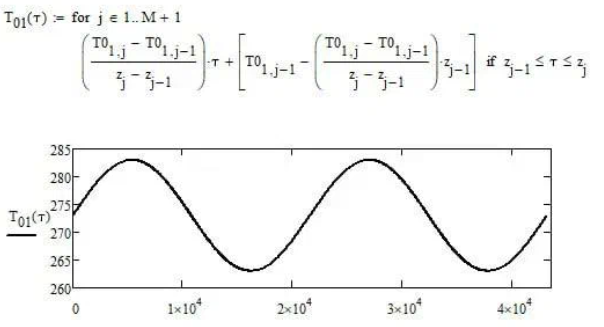

In [111]:
cells_path = 'cl'
background_path = 'bg'

In [497]:
import cv2
import numpy as np
import random
import os
from glob import glob
import matplotlib.pyplot as plt
import math 

def bg_create():
    bg = np.zeros((512,512,3), dtype=np.uint8)
    patch = glob(os.path.join('bg/',"*.png"))
    for i in range(512//32):
        for j in range(512//32):
            p = cv2.imread(random.choice(patch),cv2.IMREAD_GRAYSCALE)
            p = cv2.cvtColor(p, cv2.COLOR_GRAY2BGR)
            bg[i*32:(i+1)*32,j*32:(j+1)*32] = p
    return bg
def cell_create(bg,a,b,c,omega,i,eps_noise):
    return img
def generate():
    while 1:
        img = bg_create()
        for i in range(random.randint(1,10)):
            img = cell_create(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gs = gauss(img)
        ct = const(img)
        yield img, gs, ct

(252, 214)
(284, 252)
(316, 268)
(348, 291)
(380, 329)
(412, 350)
(444, 367)
(476, 388)
(96, 100)
(128, 117)


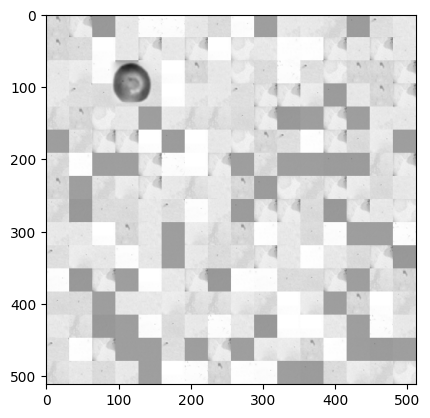

In [498]:
bg = bg_create()
a = random.random()
b = random.random()*10+2
c = random.random()*10+1
omega = random.random()
i = random.randint(70, 300)
cells = glob(os.path.join('cl/',"*.png"))
cell = cv2.imread(cells[0],cv2.IMREAD_GRAYSCALE)
cell = cv2.cvtColor(cell, cv2.COLOR_GRAY2BGR)
mask = 255 * np.ones(cell.shape, dtype=np.uint8)
for j in range(0,10):
    eps_noise = random.randint(20,40)

    if(i > 512 -64):
        i = 64
    place = (i,int(a*i + b + c * math.sin(omega*i) + eps_noise))
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    cv2.imwrite("frames/" + str(j) + "-0.png", img)

    y0 = place[1]
    x0 = i

    i = i + 32
            
    place = (i,int(a*i + b + c * math.sin(omega*i) + eps_noise))
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    cv2.imwrite("frames/" + str(j) + "-23.png", img)
    
    y1 = place[1]
    x1 = i
    x= x0 + int(32/22)
    print(place)
    for k in range(1, 23):
        x = int(x + 32/22)
        y1 = ((y1 - y0)/(x1-x0))*x + (y0 - ((y1-y0)/(x1-x0))*x0)
        place = (x,int(y1))
        img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
        cv2.imwrite("frames/" + str(j) + "-" + str(k) + ".png", img)
    plt.imshow(img, cmap = 'gray')

In [499]:
# Этап 2. Трекинг объектов.
# Используя пример, приведенный в лекции про трекинг, решить задачу трекинга объектов
# Пути (положения) объктов на каждом кадре сохранить в файл.
# Визуализировать траектории объектов на изображении.

In [500]:
#Создание видео из последовательности кадров

In [501]:
import cv2
import numpy as np
import glob

img_array = []
for i in range(0,10):
    img = cv2.imread("frames/" + str(i) + "-0.png")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    for k in range (1,23):
       img = cv2.imread("frames/" + str(i) + "-" + str(k) + ".png")
       height, width, layers = img.shape
       size = (width,height)
       img_array.append(img)
    img = cv2.imread("frames/" + str(i) + "-23.png")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
print(len(img_array))

240


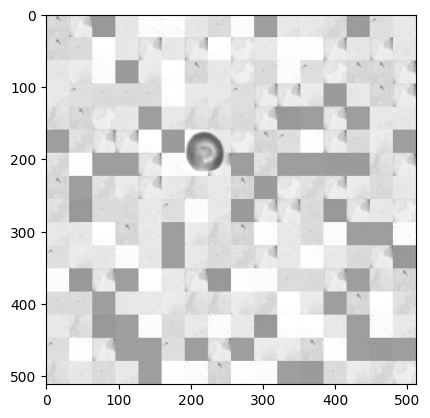

In [502]:
out = cv2.VideoWriter('video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)

for i in img_array:
   out.write(i)
out.release()
plt.imshow(img_array[0])